In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import chisquare
from scipy.interpolate import interp1d 
inter = interp1d

We will employ the Pearson Chi-Square test to show quantitatively that SN2007ld is better classified as a Type II P SN, rather thana Type Ia SN.

## Preparing Template Data

In [2]:
sn_template = pd.read_csv("sn2p_lc.v1.2.dat", delimiter="\s{1,}", header=None)

/Users/amyxiao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
sn_template.head()

,0,1
0,-11,26.00
1,-10,6.00
2,-5,1.04
3,0,0.00
4,5,0.21


In [4]:
sn_template_time = sn_template.iloc[:,0]
sn_template_mag = sn_template.iloc[:,1]

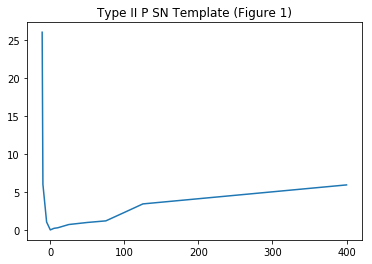

In [5]:
plt.title("Type II P SN Template (Figure 1)")
plt.plot(sn_template_time, sn_template_mag)

## Preparing SN2007ld Data

In [6]:
sn_curve = pd.read_csv("sn2007ld_photometry.csv")

In [7]:
sn_curve.head()

,event,time,magnitude,e_magnitude,upperlimit,band,instrument,telescope,source
0,SN2007ld,54346.159166,24.821,0.915,T,r',NaN,SDSS,2014arXiv1401.3317S
1,SN2007ld,54346.159166,24.821,0.803,T,r',NaN,SDSS,2010ApJ...708..661D
2,SN2007ld,54346.159995,23.993,0.871,T,i',NaN,SDSS,2014arXiv1401.3317S
3,SN2007ld,54346.159995,23.993,0.656,T,i',NaN,SDSS,2010ApJ...708..661D
4,SN2007ld,54346.160824,24.100,1.295,T,u',NaN,SDSS,2010ApJ...708..661D


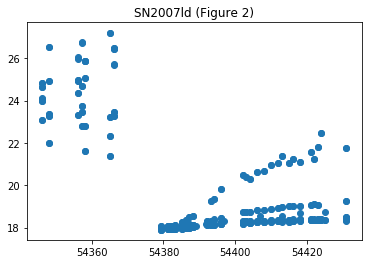

In [8]:
plt.title("SN2007ld (Figure 2)")
plt.scatter(sn_curve['time'], sn_curve['magnitude'])

In [9]:
sn_curve['band'].unique() # bands described in data

array(["r'", "i'", "u'", "z'", "g'", 'V'], dtype=object)

In [10]:
sn_vband = sn_curve[sn_curve['band'] == 'V'] # extract V band (since it's the only one given by template)
sn_vband_time = sn_vband['time']
sn_vband_mag = sn_vband['magnitude']

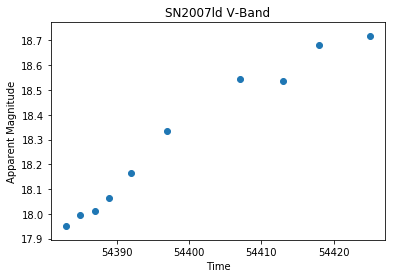

In [11]:
plt.xlabel("Time")
plt.ylabel("Apparent Magnitude")
plt.title("SN2007ld V-Band")
plt.scatter(sn_vband_time, sn_vband_mag)

## Fitting template data to SN2007ld V band data

In [12]:
# time
sn_t_max = sn_vband_time.max().max()
sn_t_min = sn_vband_time.min().min()

# V magnitudes
sn_mag_max = sn_vband_mag.max().max()
sn_mag_min = sn_vband_mag.min().min()

In [13]:
print (sn_t_min, sn_t_max)
print (sn_mag_min, sn_mag_max)

(54383.0, 54425.040000000001)
(17.949000000000002, 18.719000000000001)


In [14]:
print (sn_template_mag.min(), sn_template_mag.max())
print (sn_template_time.min(), sn_template_time.max())

(0.0, 26.0)
(-11, 400)


In [15]:
print (sn_mag_max - sn_mag_min) # range of v magnitudes
print (sn_t_max - sn_t_min) # range of time values

0.77
42.04


In [16]:
template_match_range = sn_template[(sn_template[0] >= 0)]
template_match_range

,0,1
3,0,0.00
4,5,0.21
5,10,0.28
6,25,0.71
7,50,0.98
8,75,1.19
9,100,2.30
10,125,3.42
11,400,5.92


In [17]:
mag_scale_fac = template_match_range[1].max()/0.77
mag_scale_fac

7.6883116883116882

In [18]:
time_scale_fac = template_match_range[0].max()/42.04
time_scale_fac

9.5147478591817318

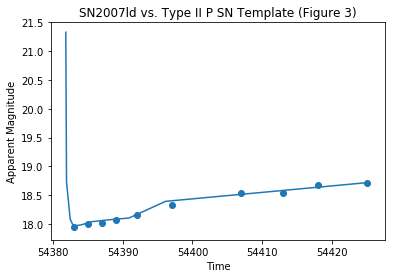

In [19]:
plt.title("SN2007ld vs. Type II P SN Template (Figure 3)")
plt.plot((sn_template_time/time_scale_fac) + sn_t_min, (sn_template_mag/mag_scale_fac)+sn_mag_min)
plt.xlabel("Time")
plt.ylabel("Apparent Magnitude")
plt.scatter(sn_vband_time, sn_vband_mag)

## Determining Goodness of Fit

In [20]:
sn_vband_mag

98     17.949
109    17.995
130    18.012
151    18.062
152    18.163
189    18.333
230    18.546
261    18.538
292    18.683
339    18.719
Name: magnitude, dtype: float64

In [21]:
((sn_template_mag/mag_scale_fac)+sn_mag_min)[2:]

2     18.084270
3     17.949000
4     17.976314
5     17.985419
6     18.041348
7     18.076466
8     18.103780
9     18.248155
10    18.393831
11    18.719000
Name: 1, dtype: float64

In [22]:
chisquare(sn_vband_mag, ((sn_template_mag/mag_scale_fac)+sn_mag_min)[2:]) # II P p-value

Power_divergenceResult(statistic=0.025939374004370332, pvalue=0.99999999993908584)

### Comparing Against Type 1a Template

In [23]:
sn1a_template = pd.read_csv("sn1a_lc.v1.2.dat", delimiter="\s{1,}", header=None)

/Users/amyxiao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [24]:
sn1a_template_time = sn1a_template.iloc[1:,0]
sn1a_template_mag = sn1a_template.iloc[1:,3]

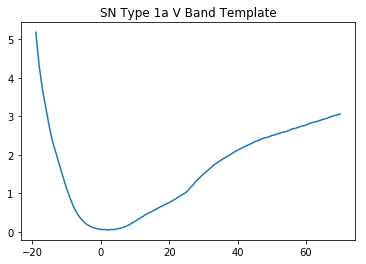

In [25]:
sn1a_template_mag
plt.title("SN Type 1a V Band Template")
plt.plot(sn1a_template_time, sn1a_template_mag)

In [26]:
sn1a_template_time_fac = sn1a_template_time.max()/42.04
sn1a_template_mag_fac = sn1a_template_mag.max()/0.77

In [27]:
sn1a_template_time_scaled = (sn1a_template_time/sn1a_template_time_fac) + sn_t_min
sn1a_template_time_scaled.head()

1    54371.589143
2    54372.189714
3    54372.790286
4    54373.390857
5    54373.991429
Name: 0, dtype: float64

In [28]:
sn1a_template_mag_scaled = (sn1a_template_mag/sn1a_template_mag_fac)+sn_mag_min
sn1a_template_mag.head()

1    5.18
2    4.30
3    3.67
4    3.19
5    2.71
Name: 3, dtype: float64

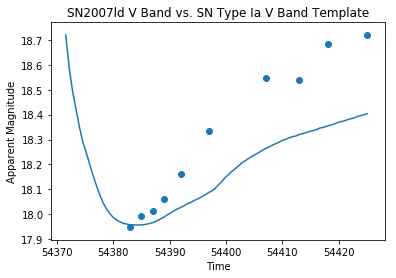

In [29]:
plt.plot(sn1a_template_time_scaled, sn1a_template_mag_scaled)
plt.xlabel("Time")
plt.ylabel("Apparent Magnitude")
plt.title("SN2007ld V Band vs. SN Type Ia V Band Template")
plt.scatter(sn_vband_time, sn_vband_mag)

In [30]:
sn_vband_time, sn_vband_mag

(98     54383.00
 109    54384.99
 130    54386.99
 151    54388.99
 152    54392.01
 189    54397.01
 230    54407.02
 261    54413.00
 292    54418.02
 339    54425.04
 Name: time, dtype: float64, 98     17.949
 109    17.995
 130    18.012
 151    18.062
 152    18.163
 189    18.333
 230    18.546
 261    18.538
 292    18.683
 339    18.719
 Name: magnitude, dtype: float64)

In [31]:
def find_template_mag_at_time(time):
    r = sn1a_template_time_scaled[(sn1a_template_time_scaled > (time - 1)) & (sn1a_template_time_scaled < (time + 1))]
    return sn1a_template_mag_scaled[r[abs(r - time) == abs(r - time).min()].index]

find_template_mag_at_time(54425.04)

90    18.403865
Name: 3, dtype: float64

In [32]:
f_vec = np.vectorize(find_template_mag_at_time)
f_vec(sn_vband_time)

array([ 17.95791892,  17.95791892,  17.96832432,  17.98913514,
        18.02778378,  18.08575676,  18.26413514,  18.32062162,
        18.35332432,  18.40386486])

In [33]:
chisquare(sn_vband_mag, f_vec(sn_vband_time)) # Ia p-value

Power_divergenceResult(statistic=0.023123654016389231, pvalue=0.99999999996363742)